<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230414.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'sample-sales-data.csv',
 'lead_conversion.csv',
 'mock_sales_data.csv',
 '1_order_payments_dataset.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'groceries.csv',
 'bz_data_analyis.csv',
 'ecommerce-data.csv',
 '1_customers_dataset.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_orders_dataset.csv',
 'sales_vs_discount.csv',
 'match_result_test.csv',
 'app_wau.csv',
 'online_retail.xlsx',
 'sales_data_with_stores.csv',
 'ab_experiment.csv',
 'online_retail_II.xlsx',
 'mall_customers.csv',
 'test.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'cookie_cats.csv',
 'sales.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'sample_data']

In [3]:
df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


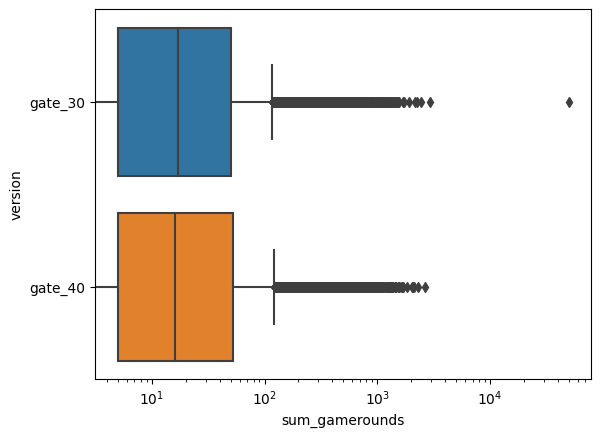

In [11]:
ax = sns.boxplot(data = df, x = 'sum_gamerounds', y = 'version')
ax.set_xscale('log')
plt.show()

In [12]:
df = df[df['sum_gamerounds'] <= 10000]

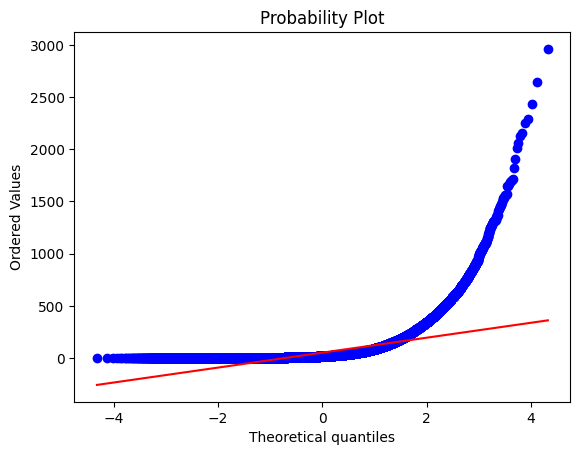

In [13]:
stats.probplot(df['sum_gamerounds'], dist = 'norm', plot = plt)
plt.show()

In [15]:
ret_1 = pd.crosstab(df['version'], df['retention_1'])
ret_7 = pd.crosstab(df['version'], df['retention_7'])
ret_7

retention_7,False,True
version,,
gate_30,36198,8501
gate_40,37210,8279


In [19]:
res_1 = stats.chi2_contingency(ret_1)
res_7 = stats.chi2_contingency(ret_7)
res_1

Chi2ContingencyResult(statistic=3.169835543170799, pvalue=0.07500999897705693, dof=1, expected_freq=array([[24798.35970417, 19900.64029583],
       [25236.64029583, 20252.35970417]]))

In [25]:
print(round(res_1.pvalue,4), res_1.pvalue < 0.05)
print(round(res_7.pvalue,4), res_7.pvalue < 0.05)

0.075 False
0.0016 True


# Iterators

In [26]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [27]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [28]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}